# Section C (Algorithm implementation using packages)
In this question, you are expected to understand and run Naive Bayes Algorithm.
Dataset: Dry Bean Dataset

In [294]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Dry_Bean_Dataset.csv')

In [279]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# (a) For the given dataset, plot the class distribution and analyze.

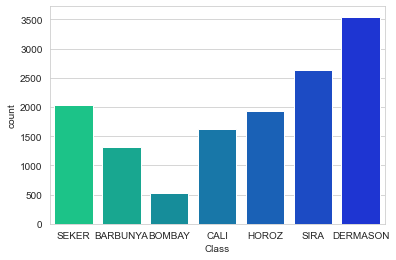

In [280]:
sns.countplot(x='Class',data=df,palette="winter_r")

Analysis:

There are 7 unique class values

The count value for Bombey is very low but counts are increasing as we are moving till Dermason class

Data is not balanced 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000138BB513310>,
      dtype=object)

<Figure size 720x720 with 0 Axes>

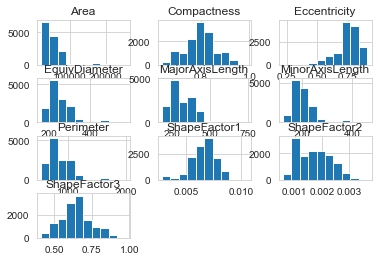

In [303]:
plt.figure (figsize= (10,10 ))
df.hist()

# (b) Perform EDA (histograms, box plots, scatterplots, etc.) and give at least
five insights on the data. Check the missing values in the dataset.

In [5]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [7]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [9]:
#checking for null values in data set/ preprocessing
df.isnull().sum()
df.isnull()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13607,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


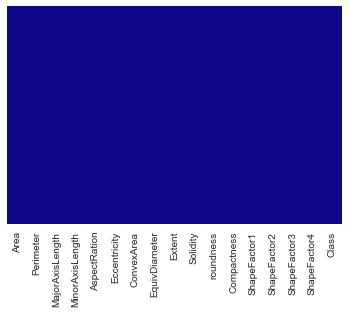

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [14]:
df = df.dropna(axis=0)  #data clean
[c for c in df.columns if df[c].isnull().sum()>0]

[]

There are no missing value present in the given data set

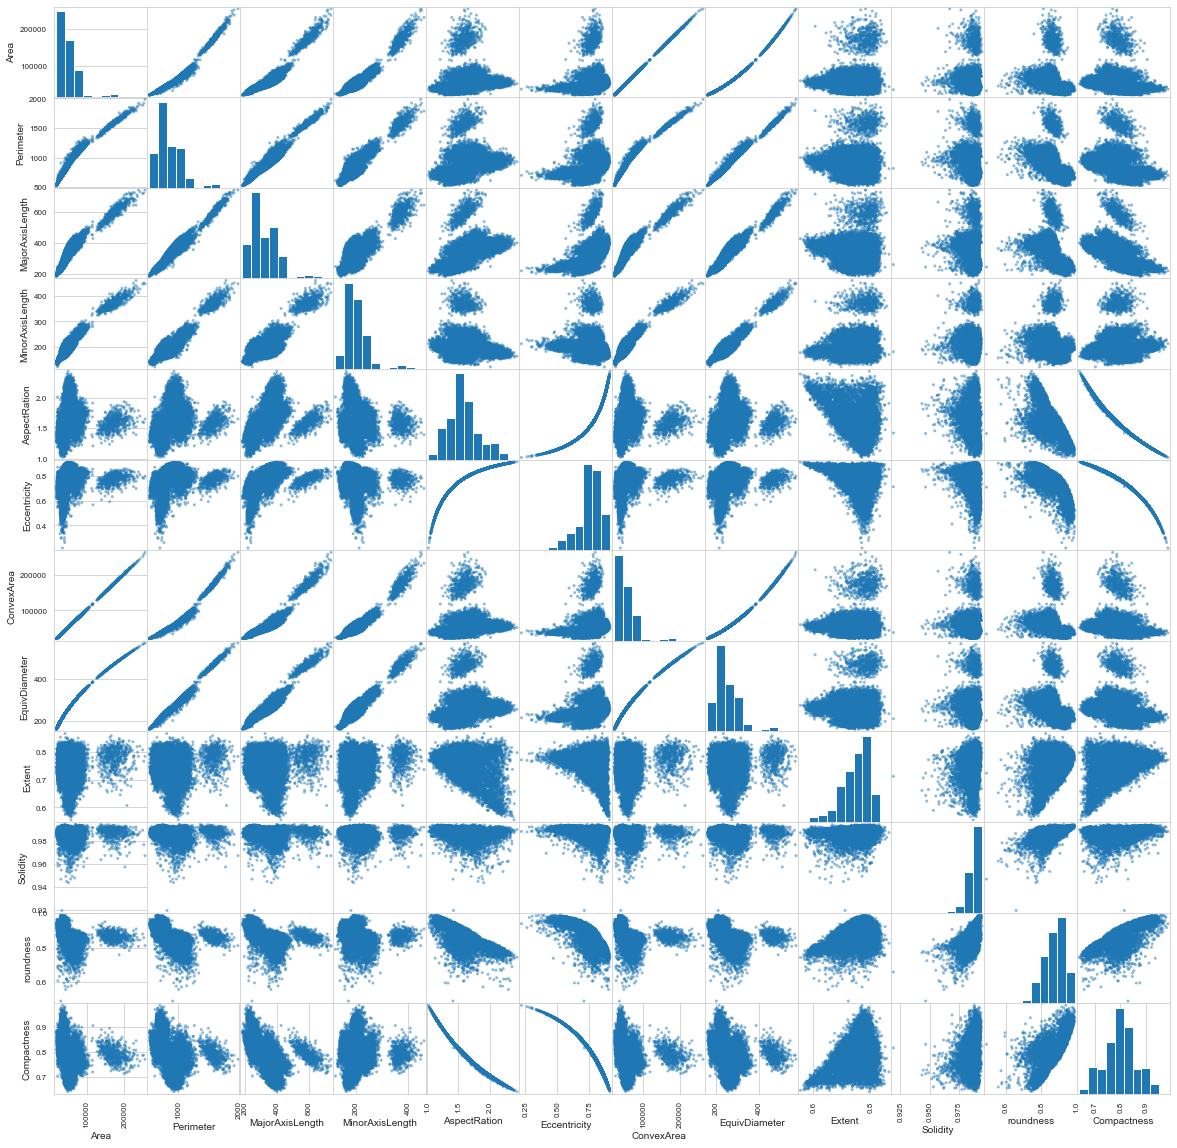

In [44]:
# Performing EDA
features = list(df.columns)[0:12]
sm = pd.plotting.scatter_matrix(df[features], figsize=(20,20))

Insights:-

In [21]:
#checking correlation
correlationMatrix = df.corr(method='pearson')

In [22]:
correlationMatrix

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


[Text(0.5, 0, 'Area'),
 Text(1.5, 0, 'Perimeter'),
 Text(2.5, 0, 'MajorAxisLength'),
 Text(3.5, 0, 'MinorAxisLength'),
 Text(4.5, 0, 'AspectRation'),
 Text(5.5, 0, 'Eccentricity'),
 Text(6.5, 0, 'ConvexArea'),
 Text(7.5, 0, 'EquivDiameter'),
 Text(8.5, 0, 'Extent'),
 Text(9.5, 0, 'Solidity'),
 Text(10.5, 0, 'roundness'),
 Text(11.5, 0, 'Compactness'),
 Text(12.5, 0, 'ShapeFactor1'),
 Text(13.5, 0, 'ShapeFactor2'),
 Text(14.5, 0, 'ShapeFactor3'),
 Text(15.5, 0, 'ShapeFactor4')]

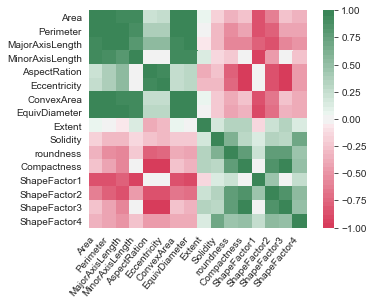

In [281]:
# corelation plot
pl = sns.heatmap(correlationMatrix,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(5,500,n=50),square=True)
pl.set_xticklabels(ax.get_xticklabels(),rotation = 50, horizontalalignment='right')

In [30]:
# converting classes into numbers (0-7)
# 0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'

df['Class'] = pd.factorize(df['Class'])[0] + 1

In [37]:
# correlation of features with target value
Corelation_with_target=pd.DataFrame(df.corr().unstack().sort_values(ascending=True)['Class'],columns=['Correlation to the target'])
Corelation_with_target.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
MinorAxisLength,-0.511069
EquivDiameter,-0.385540
Perimeter,-0.369302
ShapeFactor3,-0.352531
ConvexArea,-0.340615
Area,-0.340545
Compactness,-0.331373
MajorAxisLength,-0.257785
Extent,-0.137064
ShapeFactor4,-0.038765


Insights:-

By the above correlation we can see that shape factor 1 is highly positively correlated with the the classes

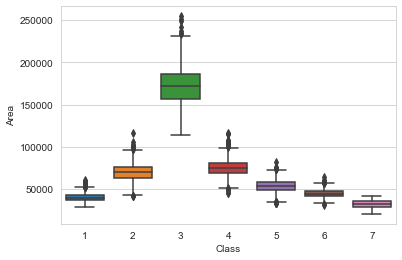

In [40]:
#  box plots  
sns.boxplot(x="Class", y="Area", data=df)

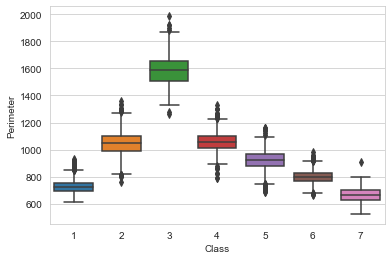

In [45]:
sns.boxplot(x="Class", y="Perimeter", data=df)

Insights:-

1 -> By the above box plots we can conclude the following:
    
2 -> Differennce of classes are affecting the area and perimeter
Bombay has highest rank in terms of this

In [ ]:
# Looking for outliers
sns.pairplot(df,hue="Class")

In [ ]:
a = df[df['ShapeFactor4'] < 0.96]
b = df[df['ShapeFactor1'] > 0.01]
c = df[df['Solidity'] < 0.95]
d = df[df['roundness'] < 0.61]
df.drop(a, inplace=True)
df.drop(b, inplace=True)
df.drop(c, inplace=True)
df.drop(d, inplace=True)

# (c) Use TSNE (t-distributed stochastic neighbor embedding) algorithm toreduce data dimensions to 2 and plot the resulting data as a scatter plot. Commenton the separability of the data.

In [231]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [245]:
x = df.iloc[:,1:16].values
x.reshape(1,-1)
y = df.iloc[:,-1]

In [247]:
lb=LabelEncoder()
y = lb.fit_transform(y.astype('str'))

In [248]:
sc = StandardScaler()
transformed_x=sc.fit_transform(x)

In [249]:
mod=TSNE(n_components=2,random_state=0)

In [250]:
data=mod.fit_transform(transformed_x)

In [251]:
tsne=np.vstack((data.T,y)).T
tsne=pd.DataFrame(data=tsne,columns=("1","2","Class"))

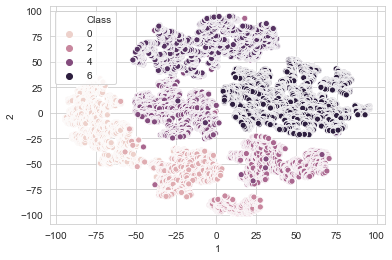

In [252]:
sns.scatterplot(x="1",y="2",hue='Class',data=tsne)

Comments:
    
1 -> Clustring is quite well using T-sne

2 -> It basically expands dense clusters(group of points) And shrinks sparse clusters

3 -> It does not preserve distances between the clusters

# (d) Run the sklearn’s implementation of Naive Bayes (Any 2 of your choice -refer here). Report Accuracy, Recall, and Precision. Comment on the results and their differences from the two implementations of Naive Bayes. (80:20 train test split)

In [99]:
#Naive Bayes Gaussian
dataset = pd.read_csv('Dry_Bean_Dataset.csv')

# xx=dataset.iloc[:,1:6]
a=ds.iloc[:,:-1]
b=ds.iloc[:,-1]

a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.20,random_state=55)

from sklearn.naive_bayes import GaussianNB
NBModel=GaussianNB()
NBModel.fit(a_train,b_train)

b_predicted=NBModel.predict(a_test)

# b_predicted

from sklearn.metrics import accuracy_score,precision_score, confusion_matrix

accuracy_score(b_test,b_predicted)*100

79.1039294895336

In [106]:
#Naive Bayes Gaussian
dataset = pd.read_csv('Dry_Bean_Dataset.csv')

# xx=dataset.iloc[:,1:6]
xx=dataset.iloc[:,1:16]
yy=dataset.iloc[:,16]

xx_train,xx_test,yy_train,yy_test=train_test_split(xx,yy,test_size=0.20,random_state=17)

from sklearn.naive_bayes import GaussianNB
NBModel=GaussianNB()
NBModel.fit(xx_train,yy_train)

yy_predicted=NBModel.predict(xx_test)

# yy_predicted

from sklearn.metrics import accuracy_score,precision_score, confusion_matrix,f1_score,recall_score
output=pd.DataFrame(['Gussian NB'],columns=['Algorithm'])
output.loc[0,'Precision']=precision_score(yy_test, yy_predicted, average='micro')
output.loc[0,'Accuracy']=accuracy_score(yy_test,yy_predicted)*100
output.loc[0,'F1 Score']=f1_score(yy_test, yy_predicted, average='micro')
output.loc[0,'Recall']=recall_score(yy_test, yy_predicted, average='micro')

,Algorithm,Precision,Accuracy,F1 Score,Recall
0,Gussian NB,0.800955,80.095483,0.800955,0.800955


In [59]:
import sklearn.metrics as metrics
print(metrics.classification_report(yy_test,yy_predicted))

              precision    recall  f1-score   support

    BARBUNYA       0.75      0.53      0.62       280
      BOMBAY       0.99      1.00      0.99        98
        CALI       0.71      0.84      0.77       337
    DERMASON       0.89      0.87      0.88       690
       HOROZ       0.82      0.82      0.82       409
       SEKER       0.75      0.74      0.74       392
        SIRA       0.76      0.83      0.80       517

    accuracy                           0.80      2723
   macro avg       0.81      0.80      0.80      2723
weighted avg       0.80      0.80      0.80      2723



In [60]:
print(metrics.confusion_matrix(yy_test,yy_predicted))

[[147   1  95   0  26   0  11]
 [  0  98   0   0   0   0   0]
 [ 42   0 284   0  10   0   1]
 [  0   0   0 599   0  60  31]
 [  5   0  23   4 335   0  42]
 [  2   0   0  50   4 289  47]
 [  0   0   0  19  33  36 429]]


In [61]:
# Naive bayes Multinomial
dataset1 = pd.read_csv('Dry_Bean_Dataset.csv')

# xxx=dataset.iloc[:,1:6]
xxx=dataset1.iloc[:,1:16]
yyy=dataset1.iloc[:,16]

xxx_train,xxx_test,yyy_train,yyy_test=train_test_split(xxx,yyy,test_size=0.20,random_state=17)

from sklearn.naive_bayes import MultinomialNB
NBModelMulti=MultinomialNB()
NBModelMulti.fit(xxx_train,yyy_train)
# MultinomialNB

yyy_predicted=NBModelMulti.predict(xxx_test)

# yyy_predicted

from sklearn.metrics import accuracy_score,precision_score, confusion_matrix

accuracy_score(yyy_test,yyy_predicted)*100

79.17737789203085

In [110]:
output.loc[1,'Algorithm']='Multinomial NB'
output.loc[1,'Precision']=precision_score(yyy_test, yyy_predicted, average='micro')
output.loc[1,'Accuracy']=accuracy_score(yyy_test,yyy_predicted)*100
output.loc[1,'F1 Score']=f1_score(yyy_test, yyy_predicted, average='micro')
output.loc[1,'Recall']=recall_score(yyy_test, yyy_predicted, average='micro')
output[1:2]

,Algorithm,Precision,Accuracy,F1 Score,Recall
1,Multinomial NB,0.791774,79.177378,0.791774,0.791774


In [63]:
print(metrics.classification_report(yy_test,yy_predicted))

              precision    recall  f1-score   support

    BARBUNYA       0.75      0.53      0.62       280
      BOMBAY       0.99      1.00      0.99        98
        CALI       0.71      0.84      0.77       337
    DERMASON       0.89      0.87      0.88       690
       HOROZ       0.82      0.82      0.82       409
       SEKER       0.75      0.74      0.74       392
        SIRA       0.76      0.83      0.80       517

    accuracy                           0.80      2723
   macro avg       0.81      0.80      0.80      2723
weighted avg       0.80      0.80      0.80      2723



In [64]:
print(metrics.confusion_matrix(yy_test,yy_predicted))

[[147   1  95   0  26   0  11]
 [  0  98   0   0   0   0   0]
 [ 42   0 284   0  10   0   1]
 [  0   0   0 599   0  60  31]
 [  5   0  23   4 335   0  42]
 [  2   0   0  50   4 289  47]
 [  0   0   0  19  33  36 429]]


In [112]:
# Comparision
output

,Algorithm,Precision,Accuracy,F1 Score,Recall
0,Gussian NB,0.800955,80.095483,0.800955,0.800955
1,Multinomial NB,0.791774,79.177378,0.791774,0.791774


We can conclude that Gaussian Naive Bayes gives better accuracy than Multinomial Naive Bayes

Gaussian Naive Bayes works well with continuous values ,probabilities modeled using Gaussian distribution where as Multinomial Naive Bayes works well when their is given the number of frequencies or occurances

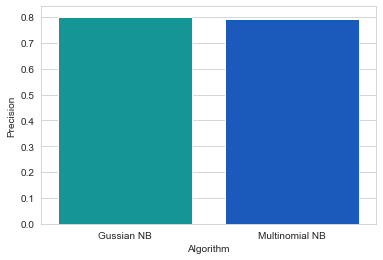

In [258]:
sns.barplot(x='Algorithm',y='Precision',data=output,palette="winter_r")

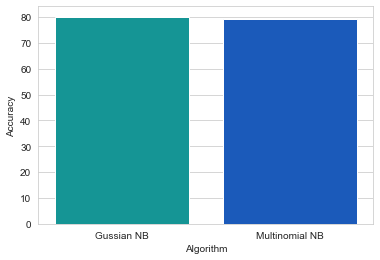

In [255]:
sns.barplot(x='Algorithm',y='Accuracy',data=output,palette="winter_r")

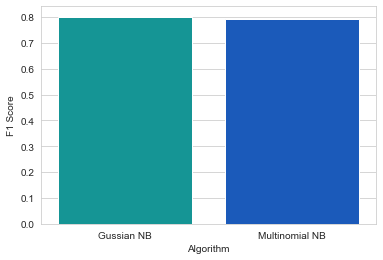

In [256]:
sns.barplot(x='Algorithm',y='F1 Score',data=output,palette="winter_r")

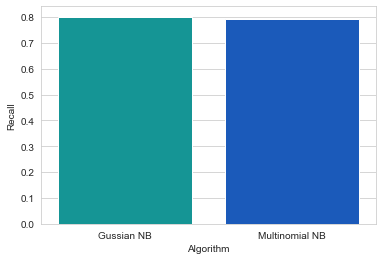

In [257]:
sns.barplot(x='Algorithm',y='Recall',data=output,palette="winter_r")

# (e) Use Principal Component Analysis (PCA) to reduce the number of fea-tures and use the reduced data set for model training. Use values 4,6,8,10 and 12 for the number of components. Compare results (Accuracy, Precision, Recall, and F-1 score). (80:20 train test split)

In [135]:
# for n=4
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
dataset3 = pd.read_csv('Dry_Bean_Dataset.csv')

xa=dataset3.iloc[:,1:16]
ya=dataset3.iloc[:,16]

dataset3['Class'] = pd.factorize(dataset3['Class'])[0] + 1
# dataset3['Class']

scaler=StandardScaler()
scaler.fit(dataset3)
scaled_data=scaler.transform(dataset3)
# scaled_data

In [136]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca.fit(scaled_data)

PCA(n_components=4)

In [137]:
x_pca=pca.transform(scaled_data)

In [138]:
scaled_data.shape

(13611, 17)

In [124]:
x_pca.shape

(13611, 4)

In [125]:
x_pca

array([[-4.85009331,  2.4335456 ,  0.99737597, -0.74460882],
       [-5.28453549,  3.54428992,  2.37538837, -0.6623527 ],
       [-4.62724508,  2.42490511,  0.75961978, -0.57801947],
       ...,
       [-1.47557195, -0.17211656, -0.58522406,  0.01509711],
       [-1.17761957, -0.50759167, -0.02808485, -0.23375543],
       [-0.83843459, -0.95679712, -1.16775889,  0.8613876 ]])

In [157]:
# Gaussian Naive Bayes on PCA
xxp=x_pca
yyp=dataset3.iloc[:,16]
xxp_train,xxp_test,yyp_train,yyp_test=train_test_split(xxp,yyp,test_size=0.20,random_state=17)

from sklearn.naive_bayes import GaussianNB
NBModel=GaussianNB()
NBModel.fit(xxp_train,yyp_train)

yyp_predicted=NBModel.predict(xxp_test)
# yyp_predicted

from sklearn.metrics import accuracy_score,precision_score, confusion_matrix,f1_score,recall_score
outputPCA=pd.DataFrame(['n=4'],columns=['PCA'])
outputPCA.loc[0,'Precision']=precision_score(yyp_test, yyp_predicted, average='micro')
outputPCA.loc[0,'Accuracy']=accuracy_score(yyp_test,yyp_predicted)*100
outputPCA.loc[0,'F1 Score']=f1_score(yyp_test, yyp_predicted, average='micro')
outputPCA.loc[0,'Recall']=recall_score(yyp_test, yyp_predicted, average='micro')

In [158]:
outputPCA

,PCA,Precision,Accuracy,F1 Score,Recall
0,n=4,0.903783,90.378259,0.903783,0.903783


In [159]:
#For n=6
pca6=PCA(n_components=6)
pca6.fit(scaled_data)

PCA(n_components=6)

In [160]:
x_pca6=pca6.transform(scaled_data)
x_pca6.shape

(13611, 6)

In [161]:
x_pca6

array([[-4.85009331,  2.4335456 ,  0.99737597, -0.74460882, -0.50967491,
        -0.43507233],
       [-5.28453549,  3.54428992,  2.37538837, -0.6623527 , -0.84884451,
         0.60872936],
       [-4.62724508,  2.42490511,  0.75961978, -0.57801947, -0.76152539,
        -0.36434234],
       ...,
       [-1.47557195, -0.17211656, -0.58522406,  0.01509711,  1.03542682,
         0.11394941],
       [-1.17761957, -0.50759167, -0.02808485, -0.23375543,  1.2843959 ,
         0.08367859],
       [-0.83843459, -0.95679712, -1.16775889,  0.8613876 , -0.11195367,
         0.43442545]])

In [162]:
# Gaussian Naive Bayes on PCA n=6
xxp6=x_pca6
yyp6=dataset3.iloc[:,16]
xxp6_train,xxp6_test,yyp6_train,yyp6_test=train_test_split(xxp6,yyp6,test_size=0.20,random_state=17)

from sklearn.naive_bayes import GaussianNB
NBModel=GaussianNB()
NBModel.fit(xxp6_train,yyp6_train)

yyp6_predicted=NBModel.predict(xxp6_test)
# yyp_predicted

from sklearn.metrics import accuracy_score,precision_score, confusion_matrix,f1_score,recall_score
outputPCA.loc[1,'PCA']='n=6'
outputPCA.loc[1,'Precision']=precision_score(yyp6_test, yyp6_predicted, average='micro')
outputPCA.loc[1,'Accuracy']=accuracy_score(yyp6_test,yyp6_predicted)*100
outputPCA.loc[1,'F1 Score']=f1_score(yyp6_test, yyp6_predicted, average='micro')
outputPCA.loc[1,'Recall']=recall_score(yyp6_test, yyp6_predicted, average='micro')

In [163]:
outputPCA

,PCA,Precision,Accuracy,F1 Score,Recall
0,n=4,0.903783,90.378259,0.903783,0.903783
1,n=6,0.924348,92.434815,0.924348,0.924348


In [164]:
#For n=8
pca8=PCA(n_components=8)
pca8.fit(scaled_data)
x_pca8=pca8.transform(scaled_data)
x_pca8.shape

(13611, 8)

In [169]:
# Gaussian Naive Bayes on PCA n=8
xxp8=x_pca8
yyp8=dataset3.iloc[:,16]
xxp8_train,xxp8_test,yyp8_train,yyp8_test=train_test_split(xxp8,yyp8,test_size=0.20,random_state=17)

from sklearn.naive_bayes import GaussianNB
NBModel=GaussianNB()
NBModel.fit(xxp8_train,yyp8_train)

yyp8_predicted=NBModel.predict(xxp8_test)
# yyp_predicted

from sklearn.metrics import accuracy_score,precision_score, confusion_matrix,f1_score,recall_score
outputPCA.loc[2,'PCA']='n=8'
outputPCA.loc[2,'Precision']=precision_score(yyp8_test, yyp8_predicted, average='micro')
outputPCA.loc[2,'Accuracy']=accuracy_score(yyp8_test,yyp8_predicted)*100
outputPCA.loc[2,'F1 Score']=f1_score(yyp8_test, yyp8_predicted, average='micro')
outputPCA.loc[2,'Recall']=recall_score(yyp8_test, yyp8_predicted, average='micro')

In [170]:
outputPCA

,PCA,Precision,Accuracy,F1 Score,Recall
0,n=4,0.903783,90.378259,0.903783,0.903783
1,n=6,0.924348,92.434815,0.924348,0.924348
2,n=8,0.928021,92.802057,0.928021,0.928021


In [171]:
#For n=10
pca10=PCA(n_components=10)
pca10.fit(scaled_data)
x_pca10=pca10.transform(scaled_data)
x_pca10.shape

(13611, 10)

In [173]:
# Gaussian Naive Bayes on PCA n=10
xxp10=x_pca10
yyp10=dataset3.iloc[:,16]
xxp10_train,xxp10_test,yyp10_train,yyp10_test=train_test_split(xxp10,yyp10,test_size=0.20,random_state=17)

from sklearn.naive_bayes import GaussianNB
NBModel=GaussianNB()
NBModel.fit(xxp10_train,yyp10_train)

yyp10_predicted=NBModel.predict(xxp10_test)
# yyp_predicted

from sklearn.metrics import accuracy_score,precision_score, confusion_matrix,f1_score,recall_score
outputPCA.loc[3,'PCA']='n=10'
outputPCA.loc[3,'Precision']=precision_score(yyp10_test, yyp10_predicted, average='micro')
outputPCA.loc[3,'Accuracy']=accuracy_score(yyp10_test,yyp10_predicted)*100
outputPCA.loc[3,'F1 Score']=f1_score(yyp10_test, yyp10_predicted, average='micro')
outputPCA.loc[3,'Recall']=recall_score(yyp10_test, yyp10_predicted, average='micro')
outputPCA

,PCA,Precision,Accuracy,F1 Score,Recall
0,n=4,0.903783,90.378259,0.903783,0.903783
1,n=6,0.924348,92.434815,0.924348,0.924348
2,n=8,0.928021,92.802057,0.928021,0.928021
3,n=10,0.919574,91.957400,0.919574,0.919574


In [174]:
#For n=12
pca12=PCA(n_components=12)
pca12.fit(scaled_data)
x_pca12=pca12.transform(scaled_data)
x_pca12.shape

(13611, 12)

In [176]:
# Gaussian Naive Bayes on PCA n=12
xxp12=x_pca12
yyp12=dataset3.iloc[:,16]
xxp12_train,xxp12_test,yyp12_train,yyp12_test=train_test_split(xxp12,yyp12,test_size=0.20,random_state=17)

from sklearn.naive_bayes import GaussianNB
NBModel=GaussianNB()
NBModel.fit(xxp12_train,yyp12_train)

yyp12_predicted=NBModel.predict(xxp12_test)
# yyp_predicted

from sklearn.metrics import accuracy_score,precision_score, confusion_matrix,f1_score,recall_score
outputPCA.loc[4,'PCA']='n=12'
outputPCA.loc[4,'Precision']=precision_score(yyp12_test, yyp12_predicted, average='micro')
outputPCA.loc[4,'Accuracy']=accuracy_score(yyp12_test,yyp12_predicted)*100
outputPCA.loc[4,'F1 Score']=f1_score(yyp12_test, yyp12_predicted, average='micro')
outputPCA.loc[4,'Recall']=recall_score(yyp12_test, yyp12_predicted, average='micro')
outputPCA

,PCA,Precision,Accuracy,F1 Score,Recall
0,n=4,0.903783,90.378259,0.903783,0.903783
1,n=6,0.924348,92.434815,0.924348,0.924348
2,n=8,0.928021,92.802057,0.928021,0.928021
3,n=10,0.919574,91.957400,0.919574,0.919574
4,n=12,0.912596,91.259640,0.912596,0.912596


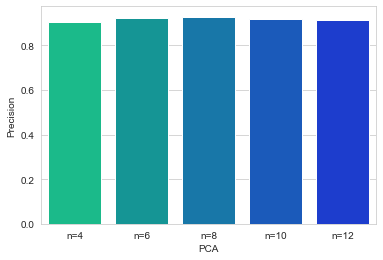

In [261]:
# Comparision between all the outputs of PCA on different n values
sns.barplot(x='PCA',y='Precision',data=outputPCA,palette="winter_r")

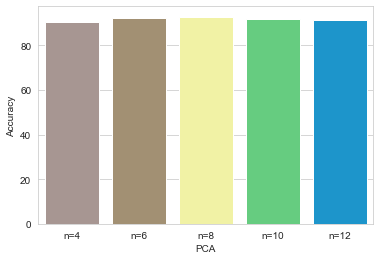

In [264]:
sns.barplot(x='PCA',y='Accuracy',data=outputPCA,palette="terrain_r")

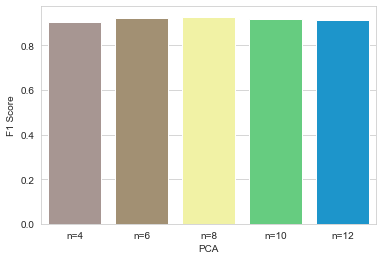

In [265]:
sns.barplot(x='PCA',y='F1 Score',data=outputPCA,palette="terrain_r")

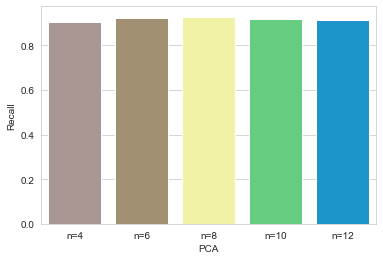

In [266]:
sns.barplot(x='PCA',y='Recall',data=outputPCA,palette="terrain_r")

# (f) Use Scikit-learn to plot the ROC-AUC curves and comment on the out-put.

In [184]:
rf = pd.read_csv('Dry_Bean_Dataset.csv')
rx=rf.iloc[:,1:16]
ry=rf.iloc[:,16]
classes = rf['Class'] = pd.factorize(rf['Class'])[0] + 1
# rf['Class']
classes

array([1, 1, 1, ..., 7, 7, 7], dtype=int64)

In [185]:
from sklearn.model_selection import train_test_split
xr_train, xr_test, yr_train, yr_test = train_test_split(rx,ry,test_size=0.2)

In [186]:
from sklearn.naive_bayes import GaussianNB
NBModel=GaussianNB()
NBModel.fit(xr_train,yr_train)

GaussianNB()

In [194]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
yr_pred = NBModel.predict(xr_test)
yr_pred

array(['SIRA', 'SIRA', 'BARBUNYA', ..., 'CALI', 'CALI', 'DERMASON'],
      dtype='<U8')

In [195]:
yr_pred_proba = NBModel.predict_proba(xr_test)

In [196]:
yr_pred_proba

array([[4.62651809e-09, 3.26783144e-51, 1.33320868e-15, ...,
        2.62400460e-04, 1.48579061e-03, 9.98251765e-01],
       [1.29264038e-08, 6.39082486e-51, 7.97618636e-15, ...,
        1.88670519e-03, 1.03196764e-04, 9.98010078e-01],
       [5.71491927e-01, 4.76824295e-28, 4.28507798e-01, ...,
        2.75005405e-07, 5.01650114e-35, 2.02863979e-27],
       ...,
       [2.35464376e-01, 1.48999789e-30, 7.34750750e-01, ...,
        2.97848742e-02, 2.02842564e-41, 3.09105278e-25],
       [8.67621163e-02, 2.43353232e-23, 9.13237884e-01, ...,
        7.77337973e-12, 1.24024007e-55, 1.85615832e-45],
       [3.40084309e-16, 5.88663667e-61, 2.38297081e-28, ...,
        2.81979404e-11, 4.70590781e-01, 1.21902082e-05]])

In [198]:
# probablity prediction
r_probs = [0 for _ in range (len(yr_test))]
nb_probs = NBModel.predict_proba(xr_test)
# ROC AUC Score using naive bayes
nb_auc = roc_auc_score(yr_test, nb_probs, multi_class='ovr' )

In [199]:
nb_auc

0.969320834251782

In [ ]:
from sklearn.preprocessing import label_binarize
y_bin=label_binarize(yr_test,classes=np.unique(yr_test))
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
nclass = classes.shape[0]

for i in range(nclass):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_bin[:,i], yr_pred_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
plt.plot(fpr[i], tpr[i], linestyle='dotted')

plt.plot([0,1],[0,1],'b**')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

# (g) Train your model using Sklearn’s implementation of Logistic Regression, choose appropriate parameters, and comment on your choice. Compare the results with the ones obtained from Naive Bayes models. (80:20 train test split)

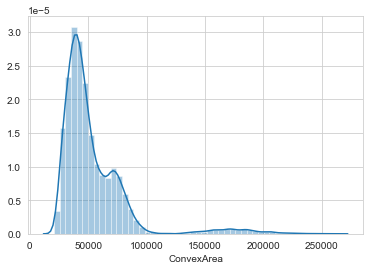

In [295]:
# Quality check to check if the data is symetric skewed etc or not
sns.distplot(df.ConvexArea)

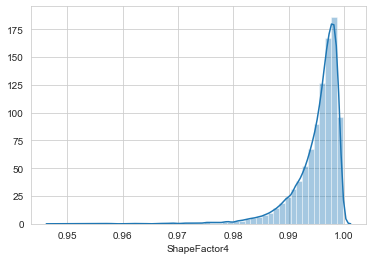

In [296]:
sns.distplot(df.ShapeFactor4)

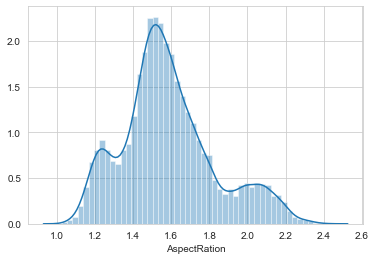

In [297]:
sns.distplot(df.AspectRation)

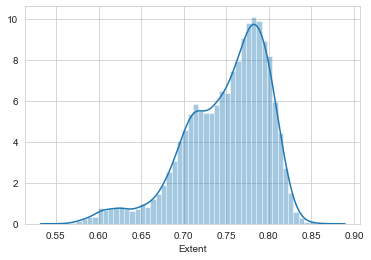

In [298]:
sns.distplot(df.Extent)

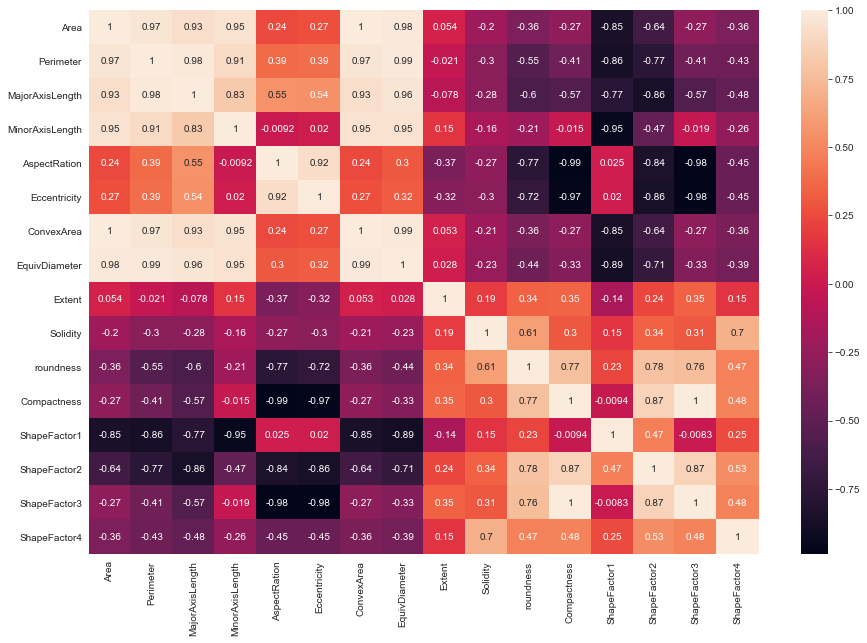

In [299]:
ds = df
plt.figure(figsize=(15,10))
sns.heatmap(ds.corr(),annot=True)

In [300]:
#droping attributes
ds.drop(['ConvexArea','Solidity', 'roundness'], axis=1, inplace=True)
ds.drop(['ShapeFactor4','Extent', 'AspectRation'], axis=1, inplace=True)

Comments:
    
By plotting we can see that many features are not balanced so we can remove them
    
We can see that many the features have high correlation with the class

'Area','ConvexArea', 'EquivDiameter' have very high multi colinearity

In [216]:
ds

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,EquivDiameter,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,Class
0,28395,610.291,208.178117,173.888747,0.549812,190.141097,0.913358,0.007332,0.003147,0.834222,1
1,28734,638.018,200.524796,182.734419,0.411785,191.272751,0.953861,0.006979,0.003564,0.909851,1
2,29380,624.110,212.826130,175.931143,0.562727,193.410904,0.908774,0.007244,0.003048,0.825871,1
3,30008,645.884,210.557999,182.516516,0.498616,195.467062,0.928329,0.007017,0.003215,0.861794,1
4,30140,620.134,201.847882,190.279279,0.333680,195.896503,0.970516,0.006697,0.003665,0.941900,1
...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,0.765002,231.515799,0.801865,0.006858,0.001749,0.642988,7
13607,42101,757.499,281.576392,190.713136,0.735702,231.526798,0.822252,0.006688,0.001886,0.676099,7
13608,42139,759.321,281.539928,191.187979,0.734065,231.631261,0.822730,0.006681,0.001888,0.676884,7
13609,42147,763.779,283.382636,190.275731,0.741055,231.653248,0.817457,0.006724,0.001852,0.668237,7


In [217]:
# Application of Logistic Regression on choosed paramenter 
# as explained above

In [219]:
xl=dataset1.iloc[:,1:16]
yl=dataset1.iloc[:,16]
xl_train,xl_test,yl_train,yl_test=train_test_split(xl,yl,test_size=0.20,random_state=17)

In [224]:
from sklearn.linear_model import LogisticRegression
r=LogisticRegression(random_state=0)
r.fit(xl_train,yl_train)
yl_predicted=r.predict(xl_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [225]:
r.score(xl_test,yl_test)

0.8659566654425266

In [226]:
outputlr=pd.DataFrame(['Linear Regression'],columns=['Algo'])
outputlr.loc[0,'Precision']=precision_score(yl_test, yl_predicted, average='micro')
outputlr.loc[0,'Accuracy']=accuracy_score(yl_test,yl_predicted)*100
outputlr.loc[0,'F1 Score']=f1_score(yl_test, yl_predicted, average='micro')
outputlr.loc[0,'Recall']=recall_score(yl_test, yl_predicted, average='micro')

In [227]:
outputlr

,Algo,Precision,Accuracy,F1 Score,Recall
0,Linear Regression,0.865957,86.595667,0.865957,0.865957


In [268]:
outputcmp=pd.DataFrame(['Linear Regression'],columns=['Algorithm'])
outputcmp.loc[0,'Precision']=precision_score(yl_test, yl_predicted, average='micro')
outputcmp.loc[0,'Accuracy']=accuracy_score(yl_test,yl_predicted)*100
outputcmp.loc[0,'F1 Score']=f1_score(yl_test, yl_predicted, average='micro')
outputcmp.loc[0,'Recall']=recall_score(yl_test, yl_predicted, average='micro')
outputcmp.loc[1,'Algorithm']='Gaussian NB'
outputcmp.loc[1,'Precision']=precision_score(yy_test, yy_predicted, average='micro')
outputcmp.loc[1,'Accuracy']=accuracy_score(yy_test,yy_predicted)*100
outputcmp.loc[1,'F1 Score']=f1_score(yy_test, yy_predicted, average='micro')
outputcmp.loc[1,'Recall']=recall_score(yy_test, yy_predicted, average='micro')

In [269]:
outputcmp

,Algorithm,Precision,Accuracy,F1 Score,Recall
0,Linear Regression,0.865957,86.595667,0.865957,0.865957
1,Gaussian NB,0.800955,80.095483,0.800955,0.800955


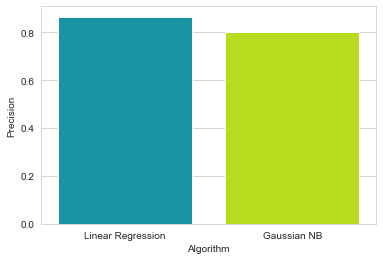

In [273]:
sns.barplot(x='Algorithm',y='Precision',data=outputcmp,palette="nipy_spectral")

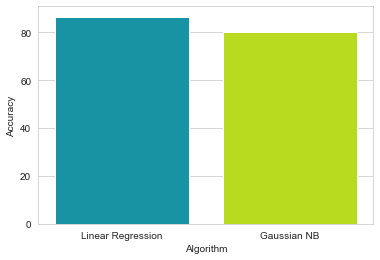

In [274]:
sns.barplot(x='Algorithm',y='Accuracy',data=outputcmp,palette="nipy_spectral")

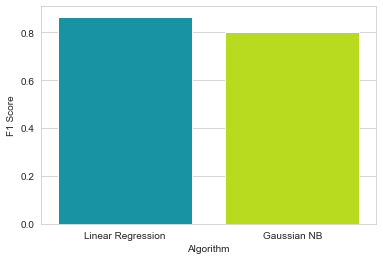

In [275]:
sns.barplot(x='Algorithm',y='F1 Score',data=outputcmp,palette="nipy_spectral")

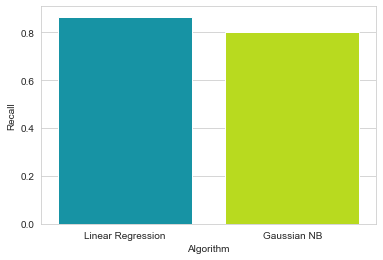

In [276]:
sns.barplot(x='Algorithm',y='Recall',data=outputcmp,palette="nipy_spectral")

Comments:

From here we can conclude that the Gaussian Naive Bayes gives better accuracy then Logistic regression
As Gaussian Naive Bayes works well with continuous values